# Import Libraries and Load Data

In [2]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set(style="whitegrid")

# Load the dataset
df = pd.read_csv('supermarket_sales.csv') # Make sure the CSV file name matches

# Display the first few rows of the dataframe
print(df.head())

    Invoice ID Branch       City Customer type  Gender  \
0  750-67-8428      A     Yangon        Member  Female   
1  226-31-3081      C  Naypyitaw        Normal  Female   
2  631-41-3108      A     Yangon        Normal    Male   
3  123-19-1176      A     Yangon        Member    Male   
4  373-73-7910      A     Yangon        Normal    Male   

             Product line  Unit price  Quantity   Tax 5%     Total       Date  \
0       Health and beauty       74.69         7  26.1415  548.9715   1/5/2019   
1  Electronic accessories       15.28         5   3.8200   80.2200   3/8/2019   
2      Home and lifestyle       46.33         7  16.2155  340.5255   3/3/2019   
3       Health and beauty       58.22         8  23.2880  489.0480  1/27/2019   
4       Sports and travel       86.31         7  30.2085  634.3785   2/8/2019   

    Time      Payment    cogs  gross margin percentage  gross income  Rating  
0  13:08      Ewallet  522.83                 4.761905       26.1415     9.1  
1  10:

# Initial Data Inspection

In [3]:
# Get a concise summary of the dataframe
print(df.info())

# Get descriptive statistics for numerical columns
print(df.describe())

# Check for missing values
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

# Visualize Missing Data

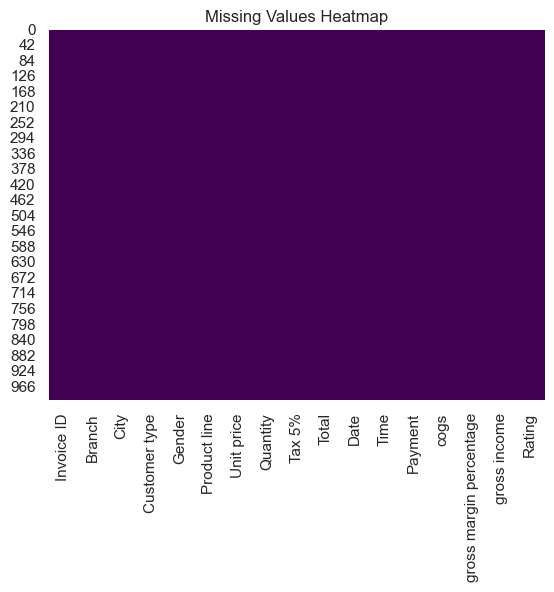

In [4]:
# Visualize missing values as a heatmap
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

# Univariate Analysis (Analyzing Single Variables)

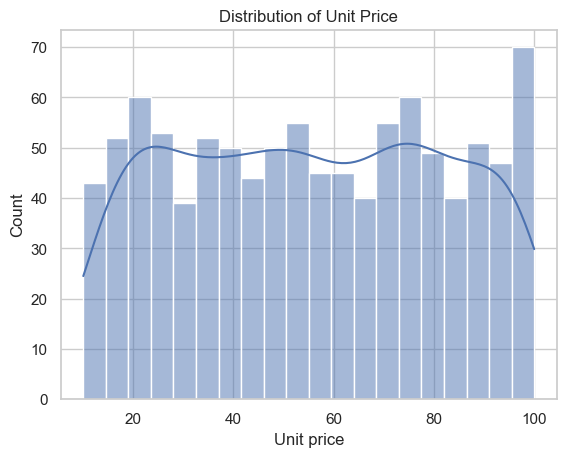

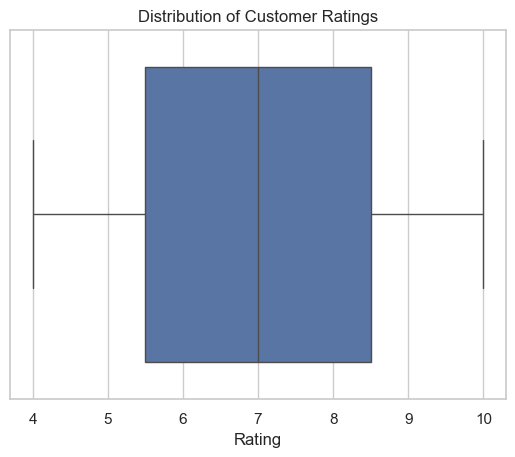

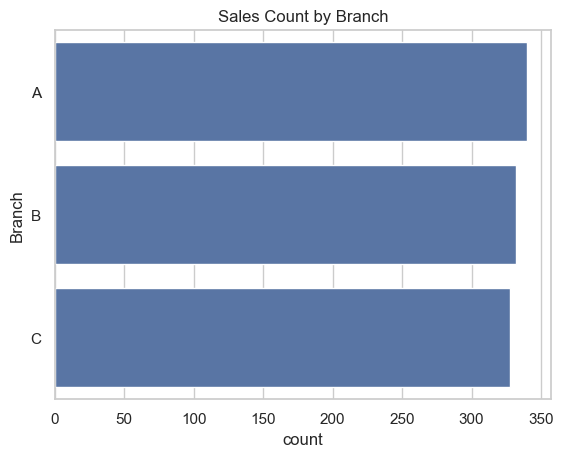

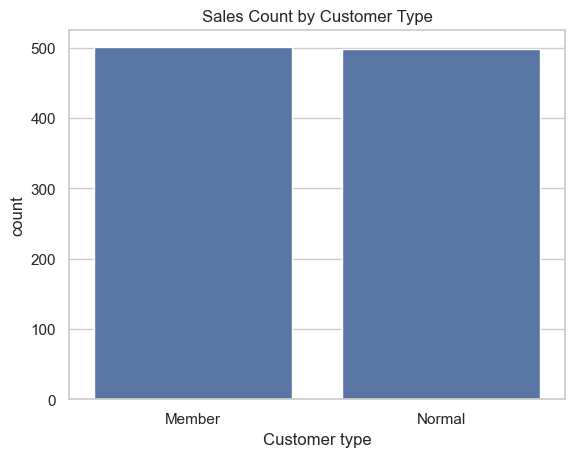

In [5]:
# --- Numerical Variables --- #
# Distribution of Unit Price
sns.histplot(df['Unit price'], kde=True, bins=20)
plt.title('Distribution of Unit Price')
plt.show()

# Distribution of Customer Rating
sns.boxplot(x=df['Rating'])
plt.title('Distribution of Customer Ratings')
plt.show()

# --- Categorical Variables --- #
# Count of sales by Branch
sns.countplot(y='Branch', data=df, order = df['Branch'].value_counts().index)
plt.title('Sales Count by Branch')
plt.show()

# Count of sales by Customer Type
sns.countplot(x='Customer type', data=df)
plt.title('Sales Count by Customer Type')
plt.show()

# Bivariate Analysis (Analyzing Relationships)

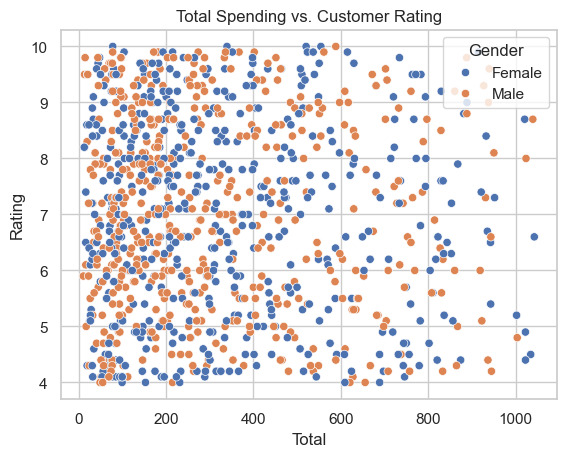

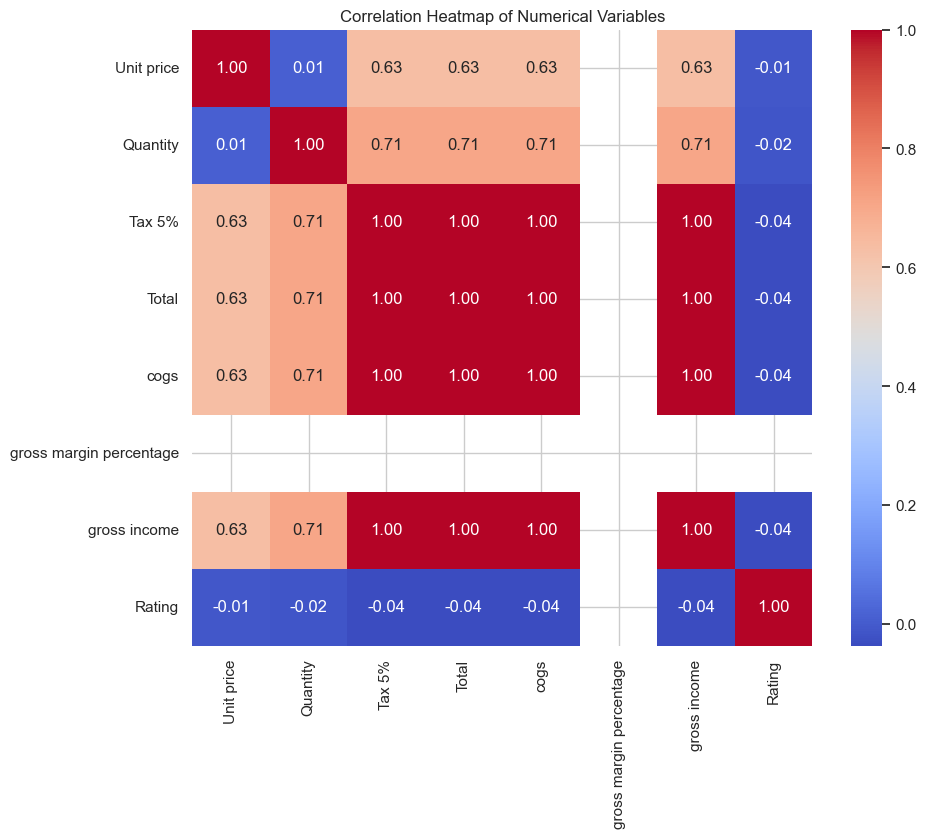

In [6]:
# Relationship between Total spending and Rating
sns.scatterplot(x='Total', y='Rating', data=df, hue='Gender')
plt.title('Total Spending vs. Customer Rating')
plt.show()

# Correlation Heatmap for numerical variables
# First, select only numerical columns for correlation matrix
numeric_cols = df.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_cols.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Numerical Variables')
plt.show()

# Grouping and Aggregation

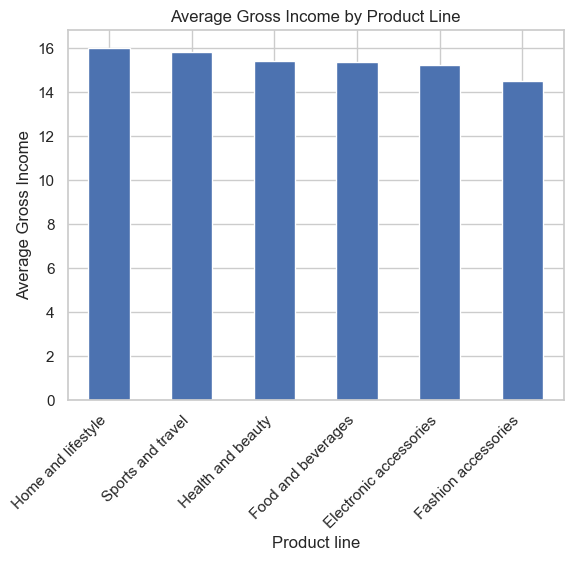

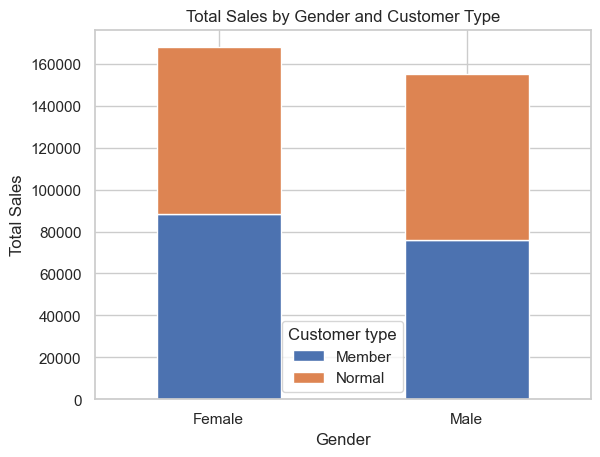

In [7]:
# Average gross income by Product line
gross_income_by_product = df.groupby('Product line')['gross income'].mean().sort_values(ascending=False)

gross_income_by_product.plot(kind='bar')
plt.title('Average Gross Income by Product Line')
plt.ylabel('Average Gross Income')
plt.xticks(rotation=45, ha='right')
plt.show()

# Total sales by Gender and Customer Type
sales_by_segment = df.groupby(['Gender', 'Customer type'])['Total'].sum().unstack()

sales_by_segment.plot(kind='bar', stacked=True)
plt.title('Total Sales by Gender and Customer Type')
plt.ylabel('Total Sales')
plt.xticks(rotation=0)
plt.show()

# Analyze Outliers and Skewness

In [8]:
# Check skewness of numerical columns
print(df.select_dtypes(include=['float64', 'int64']).skew())

Unit price                 0.007077
Quantity                   0.012941
Tax 5%                     0.892570
Total                      0.892570
cogs                       0.892570
gross margin percentage    0.000000
gross income               0.892570
Rating                     0.009010
dtype: float64
